### Objetivo

El objetivo de esta nootebook es implementar dos modelos de clasificación con el [dataset de diabetes](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) y luego comparar las métricas para decidir cuál es la mejor opción para nuestros datos.

In [1]:
#Importamos el dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Cargo el dataset

dataset = pd.read_csv('pima-indians-diabetes.csv', encoding = "ISO-8859-1", delimiter=',', header=0,
                     names= ['pregnant','glucose','pressure','triceps','insulin','mass',
                            'pedigree','age','diabetes'])  

dataset


,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


## Análisis exploratorio

In [2]:
dataset.describe()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
#Revisamos valores nulos en el dataset
dataset.isna().sum() 

pregnant    0
glucose     0
pressure    0
triceps     0
insulin     0
mass        0
pedigree    0
age         0
diabetes    0
dtype: int64

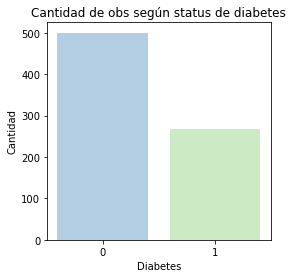

In [4]:
import matplotlib.pyplot as plt

#Analizamos la distribución de los datos de diabetes

bar= dataset.groupby(['diabetes'])['diabetes'].count().reset_index(name="n")
#bar= pd.DataFrame(bar)

fig = plt.figure(figsize =(4,4))
plt.bar(bar['diabetes'].astype(str),bar['n'], color= ["#b3cde3","#ccebc5"])
plt.xlabel("Diabetes")
plt.ylabel("Cantidad")
plt.title("Cantidad de obs según status de diabetes")
plt.show()


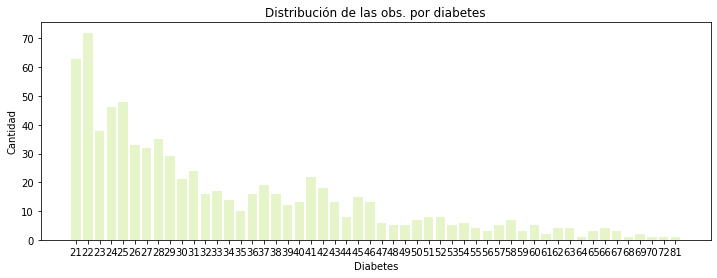

In [5]:
edad= dataset.groupby(['age'])['age'].count().reset_index(name="n")

fig = plt.figure(figsize =(12,4))
plt.bar(edad['age'].astype(str),edad['n'],color= ["#e6f5c9"])
plt.xlabel("Diabetes")
plt.ylabel("Cantidad")
plt.title("Distribución de las obs. por diabetes")
plt.show()

In [6]:
edad['%'] = round(edad['n']/sum(edad['n'])*100,2)
edad['%_acum'] = edad['%'].cumsum()
edad
#edad.reset_index(drop=True)


,age,n,%,%_acum
0,21,63,8.21,8.21
1,22,72,9.39,17.60
2,23,38,4.95,22.55
3,24,46,6.00,28.55
4,25,48,6.26,34.81
5,26,33,4.30,39.11
6,27,32,4.17,43.28
7,28,35,4.56,47.84
8,29,29,3.78,51.62
9,30,21,2.74,54.36


#### Comentarios

 - El dataset contiene __757__ observaciones de mujeres con diabetes, mayores de 21 años de edad y descendientes _pima_.
 - El análisis descripitivo muestra:
     - La variable diabetes es dicotómica y toma el valor 0 (ausencia) y 1 (presencia).
     - Todos los predictores son variables numéricas.
     - No se encuentra ningún registro con valores nulos.
 - El 65% de las mujeres del dataset no tiene diabetes.
 - El 51% de las mujeres tiene 29 años o menos y particularmente el casi el 18% de las observaciones son menores de 23 años.
 


## Dividimos el dataset en train y test

In [7]:
#Importamos las librerias

from sklearn.model_selection import train_test_split
from sklearn import linear_model

#Obtenemos las divisiones con los predictores estandarizados

X_train,X_test,y_train, y_test = train_test_split(
dataset.drop('diabetes',axis=1),dataset['diabetes'].values, random_state=123, test_size= 0.2
)


## Clasificación Modelo Logistico

In [8]:
#Instanciamos el modelo logistico y lo entrenamos

clasif_lg = linear_model.LogisticRegression(max_iter= 200)

#Entrenamos el modelo con los predictores estandarizados

clasif_lg = clasif_lg.fit(X_train, y_train)


In [9]:
#Predecimos los valores con los predictores estandarizados

pred = clasif_lg.predict(X_test)

#### Obtenemos las métricasde bondad del modelo


In [10]:
#Obtenemos las métricas de error del modelo

np.random.seed(123)

#Traemos accuracy y roc scored
import sklearn.metrics as sm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score

#Obtenemos las métricas para los datos estandarizados

accuracy = clasif_lg.score(X_test,y_test)
roc= roc_auc_score(y_test, pred)
recall = recall_score(y_test, pred)

#Obtenemos algunas métricas de error

print("Accurracy")
print("--------------------------------------------")
print("El accuracy obtenido es:", round(accuracy,2))
print("--------------------------------------------")

#Obtenemos el roc_auc

print("ROC_AUC")
print("--------------------------------------------")
print("El roc_auc obtenido es:", round(roc,2))
print("--------------------------------------------")

#Obtenemos el recall

print("RECALL")
print("--------------------------------------------")
print("La sensibilidad del clasificador es:", round(recall,2))
print("--------------------------------------------")



Accurracy
--------------------------------------------
El accuracy obtenido es: 0.76
--------------------------------------------
ROC_AUC
--------------------------------------------
El roc_auc obtenido es: 0.73
--------------------------------------------
RECALL
--------------------------------------------
La sensibilidad del clasificador es: 0.64
--------------------------------------------


In [11]:
#Complementamos las métricas con una matriz de confusión

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Matriz de confusion datos originales
cm = confusion_matrix(y_test,pred)

#Matriz de confusión datos preprocesados

cm_s = confusion_matrix(y_test,pred)



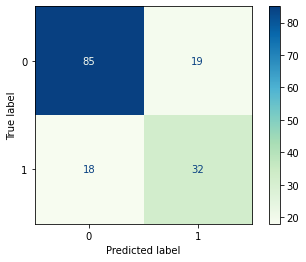

In [12]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clasif_lg.classes_)

disp.plot(cmap=plt.cm.GnBu)


#### Comentarios

 - El modelo entrenado nos ofrece muy buenas métricas de bondad de ajuste del modelo logístico para predecir la ocurrencia de diabetes en este conjunto de datos.
 - La matriz de confusión muestra que se clasificaron correctamente __117__ observaciones de __168 (76%)__. 
 - Si bien aquí el área bajo la curva y el accuracy son cercanos, en escenarios con datos desbalanceados, el accuracy puede inducirnos a conclusiones no adecuadas. Por eso, en esos escenarios es muy importante analizar el roc_auc que mide la relación entre la sensibilidad y la especificidad.
 - Para este caso, __sensibilidad o recall es 64%__ lo que implica que nuestro modelo de cada 100 positivos (en este caso enfermos de diabetes) solo capta 64 de ellos.       
 - Para mejorar la performance podríamos analizar una matriz de correlación para revisar colinealidad y excluir aquéllos predictores que muestren este fenómeno.

## Entrenamos un Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

#Instanciamos el modelo
tree = DecisionTreeClassifier()

#Dividimos el dataset

#Entrenamos el árbol de decision

arbol = tree.fit(X_train,y_train)

#Generamos las predicciones

y_predicha = arbol.predict(X_test)


### Obtenemos las métricas del modelo

In [14]:
### Comparamos las metricas

#Obtenemos algunas métricas de error

np.random.seed(123)

accuracy_dt = arbol.score(X_test,y_test)
roc_dt = roc_auc_score(y_test, y_predicha)
recall_dt = recall_score(y_test, y_predicha)

#Obtenemos algunas métricas de error

print("Accurracy")
print("--------------------------------------------")
print("El accuracy obtenido es:", round(accuracy_dt,2))
print("--------------------------------------------")

#Obtenemos el roc_auc

print("ROC_AUC")
print("--------------------------------------------")
print("El roc_auc obtenido es:", round(roc_dt,2))
print("--------------------------------------------")

#Obtenemos el recall

print("RECALL")
print("--------------------------------------------")
print("La sensibilidad del clasificador es:", round(recall_dt,2))
print("--------------------------------------------")


Accurracy
--------------------------------------------
El accuracy obtenido es: 0.68
--------------------------------------------
ROC_AUC
--------------------------------------------
El roc_auc obtenido es: 0.65
--------------------------------------------
RECALL
--------------------------------------------
La sensibilidad del clasificador es: 0.56
--------------------------------------------


#### Comentarios

- En este ejemplo podemos observar que el modelo decision tree arroja métricas de bondad menores a las obtenidas con el modelo logístico.
- Para buscar mejorar esas métricas haremos la optimización de dos parámetros del modelo (que son aquéllos que el modelo no puede aprender) y reevaluaremos la bondad del modelo.

In [15]:
from sklearn.model_selection import GridSearchCV #grid search

#Modelo
np.random.seed(123)

tree = DecisionTreeClassifier()

# Hiperoptimizacion del max_depth

param_grid = { 
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_dt = GridSearchCV(estimator=tree, param_grid=param_grid, cv= 5)


CV_dt.fit(X_train, y_train)

#Buscamos el mejor estimador

CV_dt.best_estimator_

DecisionTreeClassifier(max_depth=5)

In [16]:
#Vemos los errores

resultados = pd.DataFrame(CV_dt.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False)

,param_criterion,param_max_depth,mean_test_score,std_test_score
1,gini,5,0.747194,0.043661
6,entropy,5,0.745568,0.046107
5,entropy,4,0.738998,0.061442
0,gini,4,0.735799,0.038901
4,gini,8,0.727682,0.055306
9,entropy,8,0.724350,0.052563
8,entropy,7,0.724337,0.062720
2,gini,6,0.724297,0.033148
3,gini,7,0.716247,0.052210
7,entropy,6,0.716127,0.040442


In [17]:
#Re entrenamos el modelo con el mejor estimador
np.random.seed(123)

tree_refit = DecisionTreeClassifier(criterion='entropy', max_depth=4)

tree_refit.fit(X_train,y_train)

refit_y_predicha= tree_refit.predict(X_test)


In [18]:
#Extraemos las métricas con el modelo hiperoptimizado
np.random.seed(123)

accuracy_dt_refit = tree_refit.score(X_test,y_test)
roc_dt_refit = roc_auc_score(y_test, refit_y_predicha)
recall_dt_refit = recall_score(y_test, refit_y_predicha)

#Obtenemos algunas métricas de error

print("Accurracy")
print("--------------------------------------------")
print("El accuracy luego de la optimización es:", round(accuracy_dt_refit,2))
print("--------------------------------------------")

#Obtenemos el roc_auc

print("ROC_AUC")
print("--------------------------------------------")
print("El roc_auc luego de la optimización es:", round(roc_dt_refit,2))
print("--------------------------------------------")

#Obtenemos el recall

print("RECALL")
print("--------------------------------------------")
print("La sensibilidad del clasificador optimizado es:", round(roc_dt_refit,2))
print("--------------------------------------------")


Accurracy
--------------------------------------------
El accuracy luego de la optimización es: 0.78
--------------------------------------------
ROC_AUC
--------------------------------------------
El roc_auc luego de la optimización es: 0.75
--------------------------------------------
RECALL
--------------------------------------------
La sensibilidad del clasificador optimizado es: 0.75
--------------------------------------------


#### Comentarios

- Aquí se puede observar como hemos obtenido una mejoría de las métricas de ajuste del modelo luego de la __optimización de hiperparámetros__ pasando de un __accuracy__ de 68% a 78%.

### Obtenemos la importancia de los predictores

In [19]:
#Vemos la importancia de los predictores

importancia_predictores = pd.DataFrame(
                            {'predictor': dataset.drop('diabetes',axis=1).columns,
                             'importancia':tree_refit.feature_importances_}
                            )
importancia_predictores.sort_values('importancia', ascending=False)

,predictor,importancia
1,glucose,0.415139
5,mass,0.343531
7,age,0.123009
4,insulin,0.054988
2,pressure,0.041732
6,pedigree,0.021600
0,pregnant,0.000000
3,triceps,0.000000


#### Comentarios
- En el cuadro se puede ver con claridad que en la __clasificación__ de la presencia de diabetes el predictor con __mayor importancia__ es el __nivel de glucosa en sangre__, seguido por el __peso corporal__ (medido mediante el Indice de Masa Corporal).

#### Obtenemos un gráfico de nuestro modelo decision tree

In [21]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree_refit, out_file='tree_refit.dot',class_names= str(dataset['diabetes'].unique()),feature_names= dataset.drop('diabetes',axis= 1).columns , impurity=False, filled=True)



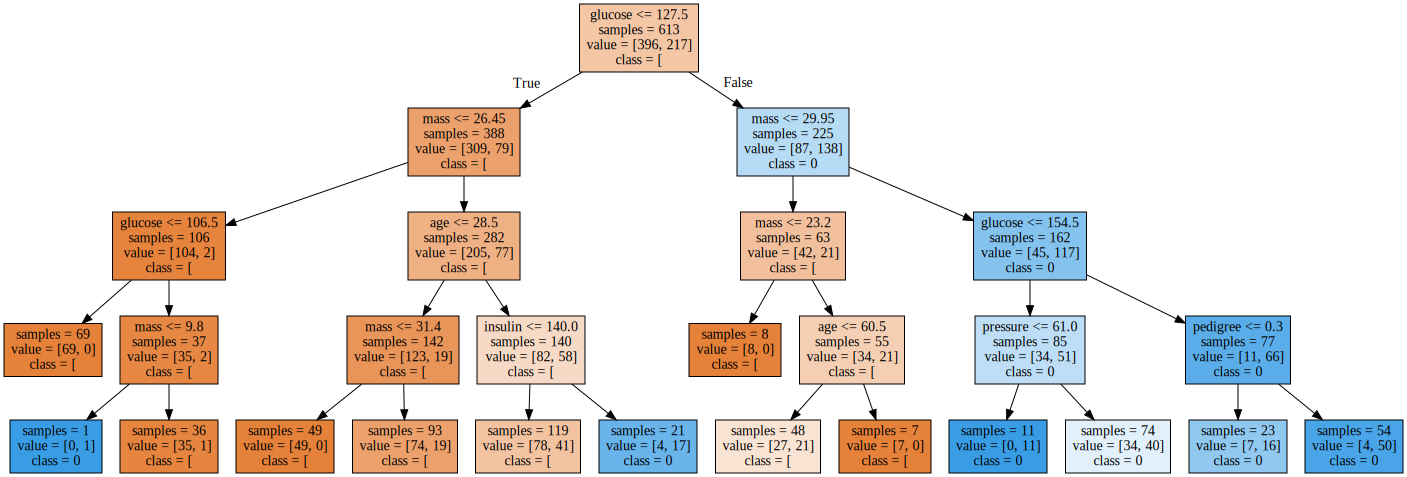

In [22]:
with open('tree_refit.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

## Conclusiones
- En esta notebook utilizamos dos modelos para clasificar registros de mujeres según la presencia o no de diabetes.
- Abordamos diferentes métricas para evaluar la __bondad de nuestro modelo__ y discutimos brevemente la razón por la que en ciertos escenarios el uso del __accuracy__ de forma aislada puede no ser adecuado y debemos complementarlo con otras métricas como el __roc_auc__ y el __recall__
- En otras notebook analizaremos otras estrategias para mejorar las métricas de bondad del modelo como el __escalado__ o la __normalización__ de los predictores y la revisión de __colinealidad__.